In [35]:
import rclpy
from pi3hat_moteus_int_msgs.msg import JointsCommand,JointsStates
import rosbag2_api.read_bag as rb
import rosbag2_api.save_csv_file as csv_wrt
import os 
from matplotlib import pyplot as plt
import numpy as np
from statistics import mean,stdev

import mpld3
mpld3.enable_notebook()
# %matplotlib widget

In [36]:
exp_name = 'test_2023_09_05__16_19_05_00'
new_folder_ = 'best_data/'

## configurazione ottimizzazione
# name_folder = new_folder_ + 'Test_jump_17_10_2023_019_q0_5_ff'
name_folder = new_folder_ + 'Test_jump_18_10_2023_019_q0_23' 
# name_folder = new_folder_ + 'Test_jump_18_10_2023_019_q0_22_ff'
# ## name_folder = new_folder_ + 'Test_jump_19_09_2023_006_ground' 
## configurazione panino
# name_folder = new_folder_ + 'Test_jump_18_10_2023_019_q0_bimbi_15'


In [37]:
## useful param 
line_width = 3
font_size = 14
cond_cmd_big = 8.0
cond_cmd_big = 10.0
alpha = 0.5
label_i = [r'Hip ', r'Knee'] 

In [38]:
act_path  = os.path.join(os.path.expanduser("~"),"Documents")
mul_env_path = os.path.join(os.path.expanduser("~"),"Documents","softlegjump_ws")
stt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"stt_"+exp_name,"stt_"+exp_name+"_0.db3")
cmd_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"cmd_"+exp_name,"cmd_"+exp_name+"_0.db3")
per_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"per_"+exp_name,"per_"+exp_name+"_0.db3")

print(stt_bag_path)
print(os.path.exists(stt_bag_path), os.path.exists(cmd_bag_path), os.path.exists(per_bag_path))


/home/mulinexopc/Documents/softlegjump_ws/best_data/Test_jump_18_10_2023_019_q0_23_test_bag/stt_test_2023_09_05__16_19_05_00/stt_test_2023_09_05__16_19_05_00_0.db3
True True True


In [39]:
stt_msgs = rb.read_from_all_topics(stt_bag_path)
stt_msg = stt_msgs[0][3]

jnt_num = len(stt_msg[0].name)
stt_num = len(stt_msgs[0][2])

msr_times = np.full(stt_num,0.0)
# for i in range(stt_num):
#     print(stt_msg[i].header.stamp.sec)
msr_pos = np.full((stt_num,jnt_num),0.0)
msr_vel = np.full((stt_num,jnt_num),0.0)
msr_eff = np.full((stt_num,jnt_num),0.0)
msr_temp = np.full((stt_num,jnt_num),0.0)
msr_curr = np.full((stt_num,jnt_num),0.0)
msr_count = np.full(stt_num,0.0)
msr_sec_end_pos = np.full((stt_num,jnt_num),0.0)

for i in range(stt_num):
    # print(stt_msg[i].header.stamp.sec,stt_msg[i].header.stamp.nanosec)
    msr_times[i] = stt_msg[i].header.stamp.sec + stt_msg[i].header.stamp.nanosec/pow(10,9)
    for j in range(jnt_num):
        msr_pos[i][j] = stt_msg[i].position[j]
        msr_vel[i][j] = stt_msg[i].velocity[j]
        msr_eff[i][j] = stt_msg[i].effort[j]
        msr_temp[i][j] = stt_msg[i].temperature[j]
        msr_curr[i][j] = stt_msg[i].current[j]
        msr_sec_end_pos[i][j] = stt_msg[i].sec_enc_pos[j]

In [40]:
cmd_msgs = rb.read_from_all_topics(cmd_bag_path)
cmd_msg = cmd_msgs[0][3]

jnt_num = len(cmd_msg[0].name)
cmd_num = len(cmd_msgs[0][2])

cmd_times = cmd_msgs[0][2]
# for i in range(stt_num):
#     print(stt_msg[i].header.stamp.sec)
cmd_pos = np.full((cmd_num,jnt_num),0.0)
cmd_vel = np.full((cmd_num,jnt_num),0.0)
cmd_eff = np.full((cmd_num,jnt_num),0.0)
# cmd_kp = np.full((cmd_num,jnt_num),0.0)

for i in range(cmd_num):
    # print(stt_msg[i].header.stamp.sec,stt_msg[i].header.stamp.nanosec)
    cmd_times[i] = cmd_times[i]/pow(10, 9)#  cmd_msg[i].header.stamp.sec + cmd_msg[i].header.stamp.nanosec/pow(10,9)
    for j in range(jnt_num):
        cmd_pos[i][j] = cmd_msg[i].position[j]
        cmd_vel[i][j] = cmd_msg[i].velocity[j]
        
        cmd_eff[i][j] = cmd_msg[i].effort[j]
        # msr_temp[i][j] = stt_msg[i].temperature[j]

In [41]:
print('Real Time Task:\n\n\tHoming 5 sec\n\tTask sec', np.around(-msr_times[0] + msr_times[-1] - 5, decimals=4))
print('dt:\n\tMeas: {}\n\tSend {} [sec]'.format(np.around((-msr_times[0] + msr_times[-1])/len(msr_times), decimals=4), 
                                                np.around((cmd_times[-1] - cmd_times[0])/len(cmd_times), decimals=4) ))

Real Time Task:

	Homing 5 sec
	Task sec 9.936
dt:
	Meas: 0.0017
	Send 0.0016 [sec]


In [42]:
# import pandas

# csv_dic = {"time": msr_times, "count" : msr_count, "msr_pos": msr_pos[:,0], "msr_vel": msr_vel[:,0], "msr_eff": msr_eff[:,0], "msr_temp":msr_temp[:,0],}
# df = pandas.DataFrame(csv_dic)
# df.to_csv("msr_"+exp_name+"_c2.csv")

# csv_dic = {"time": msr_times, "count" : msr_count, "msr_pos": msr_pos[:,1], "msr_vel": msr_vel[:,1], "msr_eff": msr_eff[:,1], "msr_temp":msr_temp[:,1]}
# df = pandas.DataFrame(csv_dic)
# df.to_csv("msr_"+exp_name+"_c3.csv")

# csv_dic = {"time": cmd_times,  "cmd_eff": cmd_eff[:,0]}
# df = pandas.DataFrame(csv_dic)
# df.to_csv("cmd_"+exp_name+"_c2.csv")

# csv_dic = {"time": cmd_times, "cmd_eff": cmd_eff[:,1]}
# df = pandas.DataFrame(csv_dic)
# df.to_csv("cmd_"+exp_name+"_c3.csv")

In [43]:
cmd_times = np.array(cmd_times) - np.array(cmd_times)[0]
msr_times = np.array(msr_times) - np.array(msr_times)[0]

## config panino cut time 
cond_cmd = np.logical_and(cmd_times > 13.0, cmd_times < 15.0)
cond_msr = np.logical_and(msr_times > 13.0, msr_times < 15.0)

## config panino cut time 
# cond_cmd = np.logical_and(cmd_times > 8.0, cmd_times < 10.0)
# cond_msr = np.logical_and(msr_times > 8.0, msr_times < 10.0) 

index_cmd = np.where(cond_cmd)[0]
index_msr = np.where(cond_msr)[0]

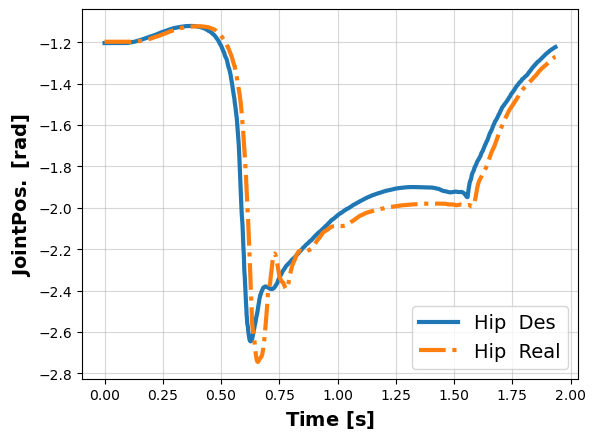

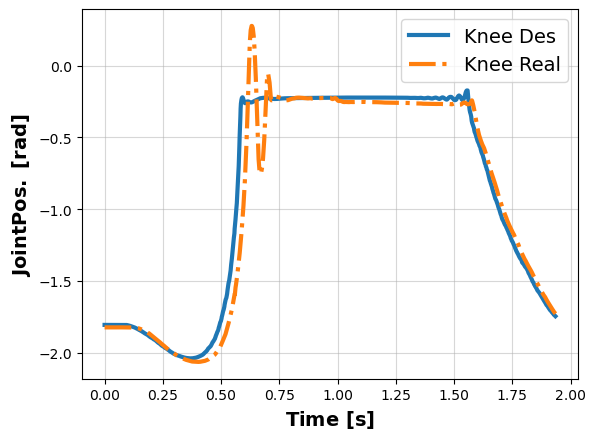

In [44]:
# from matplotlib import rcParams
# plt.rcParams['text.usetex'] = True

line_write = 'up_max'

for  i in range(2):
    fig, ax = plt.subplots()
    # ax.axvline(x=1, color='g', linestyle='--', label=line_write, linewidth=1.5)
    plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT"+ str(i + 1) + "_pos_plot.svg")
    plt.plot(cmd_times[index_cmd] - cmd_times[index_cmd[0]], cmd_pos[index_cmd,i],linewidth=line_width, label=label_i[i] + r' Des')
    plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_pos[index_msr,i],linewidth=line_width, linestyle = '-.', label=label_i[i] + r' Real')
    # plt.title('Joint' + str(i + 1) + ' Pos [rad]')

    plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
    plt.ylabel(r'$\mathbf{Joint Pos.\,\, [rad]}$', fontsize=font_size)  # Increase font size for radians label

    plt.legend(fontsize=font_size) 
    plt.grid(alpha=alpha)  
    plt.savefig(plt_bag_path)
    plt.show() 

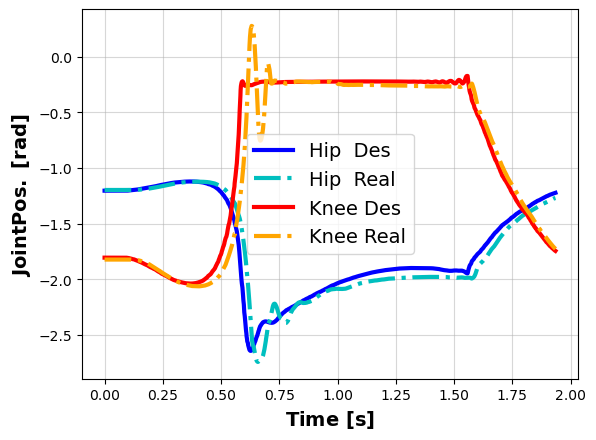

In [63]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT_TOT" + "_pos_plot.svg")
plt.plot(cmd_times[index_cmd] - cmd_times[index_cmd[0]], cmd_pos[index_cmd,0],linewidth=line_width, color= 'b', label=label_i[0] + r' Des')
plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_pos[index_msr,0],linewidth=line_width, color= 'c', linestyle = '-.', label=label_i[0] + r' Real')

plt.plot(cmd_times[index_cmd] - cmd_times[index_cmd[0]], cmd_pos[index_cmd,1],linewidth=line_width, color= 'r', label=label_i[1] + r' Des')
plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_pos[index_msr,1],linewidth=line_width, color= [1.0,165/255,0.0], linestyle = '-.', label=label_i[1] + r' Real')

plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
plt.ylabel(r'$\mathbf{Joint\,\, Pos.\,\, [rad]}$', fontsize=font_size)  # Increase font size for radians label

plt.legend(fontsize=font_size, loc='best') 
plt.grid(alpha=alpha)  
plt.savefig(plt_bag_path)
plt.show() 

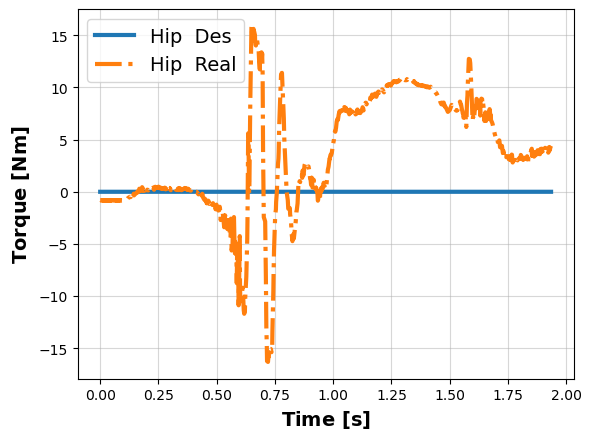

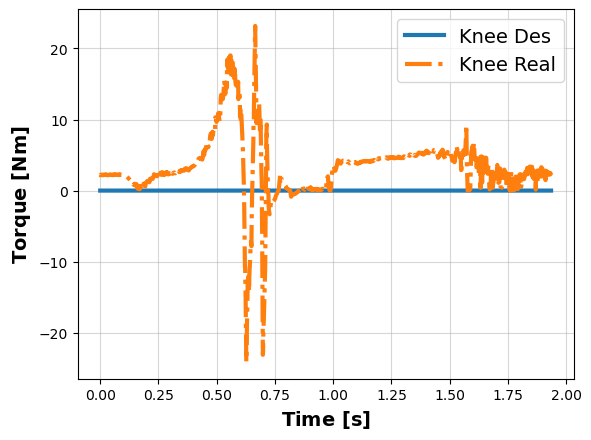

In [45]:

for  i in range(2):
    fig, ax = plt.subplots()
    # ax.axvline(x=1, color='g', linestyle='--', label=line_write, linewidth=1.5)
    plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT"+ str(i + 1) + "_tor_plot.svg")
    plt.plot(cmd_times[index_cmd] - cmd_times[index_cmd[0]], cmd_eff[index_cmd,i],linewidth=line_width, label=label_i[i] + r' Des')
    plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_eff[index_msr,i],linewidth=line_width, linestyle = '-.', label=label_i[i] + r' Real')

    plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
    plt.ylabel(r'$\mathbf{Torque\,\, [Nm]}$', fontsize=font_size)  # Increase font size for radians label

    plt.legend(fontsize=font_size) 
    plt.grid(alpha=alpha)  
    plt.savefig(plt_bag_path)
    plt.show() 

In [ ]:
import matplotlib.colors as mcolors

fig, ax = plt.subplots()
plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT_TOT" + "_vel_plot.svg")
plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_vel[index_msr,0],linewidth=line_width, color= 'c', linestyle = '-.', label=label_i[0] + r' Real')
plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_vel[index_msr,1],linewidth=line_width, color= [1.0,165/255,0.0], linestyle = '-.', label=label_i[1] + r' Real')

plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
plt.ylabel(r'$\mathbf{Joint\,\, Vel.\,\, [rad]}$', fontsize=font_size)  # Increase font size for radians label

plt.legend(fontsize=font_size, loc='best') 
plt.grid(alpha=alpha)  
plt.savefig(plt_bag_path)
plt.show() 

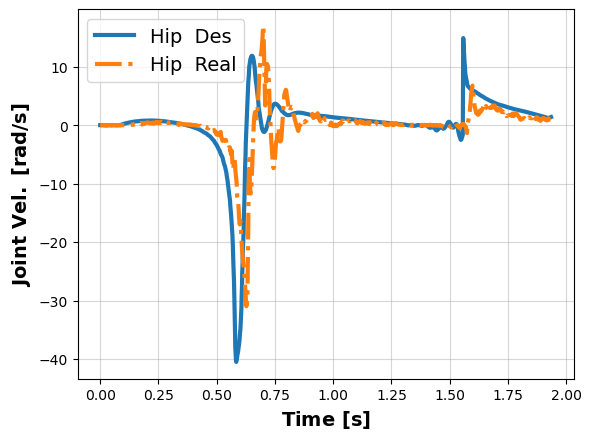

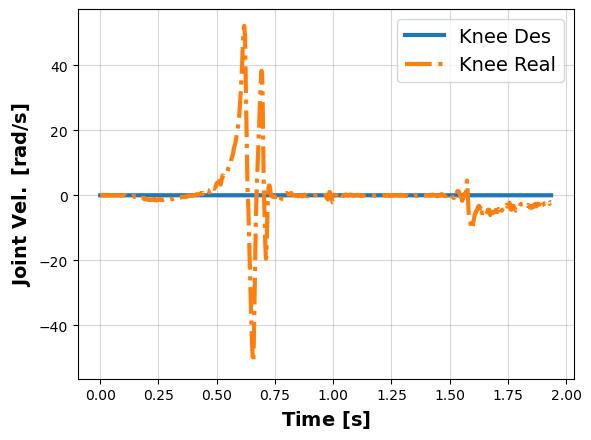

In [64]:
for  i in range(2):
    fig, ax = plt.subplots()
    # ax.axvline(x=1, color='g', linestyle='--', label=line_write, linewidth=1.5)
    plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT"+ str(i + 1) + "_vel_plot.svg")
    plt.plot(cmd_times[index_cmd] - cmd_times[index_cmd[0]], cmd_vel[index_cmd,i],linewidth=line_width, label=label_i[i] + r' Des')
    plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_vel[index_msr,i],linewidth=line_width, linestyle = '-.', label=label_i[i] + r' Real')

    plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
    plt.ylabel(r'$\mathbf{Joint\,\, Vel.\,\, [rad/s]}$', fontsize=font_size)  # Increase font size for radians label

    plt.legend(fontsize=font_size) 
    plt.grid(alpha=alpha)  
    plt.savefig(plt_bag_path)
    plt.show() 

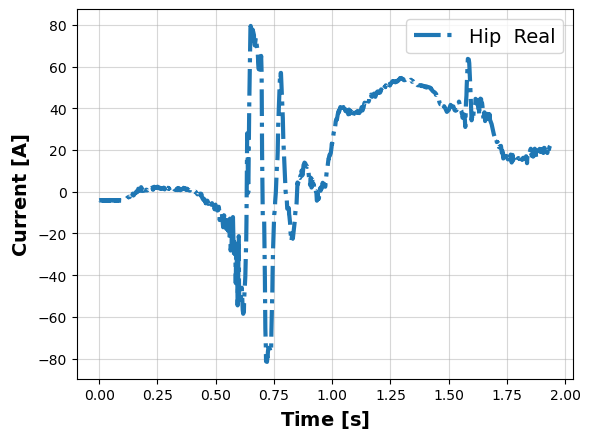

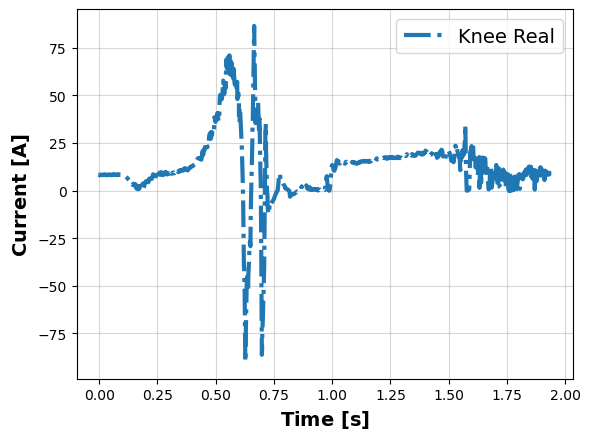

In [47]:
for  i in range(2):
    fig, ax = plt.subplots()
    # ax.axvline(x=1, color='g', linestyle='--', label=line_write, linewidth=1.5)
    plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT"+ str(i + 1) +"_plot_cur.svg")
    plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_curr[index_msr,i],linewidth=line_width, linestyle = '-.', label=label_i[i] + r' Real')
    plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
    plt.ylabel(r'$\mathbf{Current\,\, [A]}$', fontsize=font_size)  # Increase font size for radians label

    plt.legend(fontsize=font_size) 
    plt.grid(alpha=alpha)  
    plt.savefig(plt_bag_path)
    plt.show() 


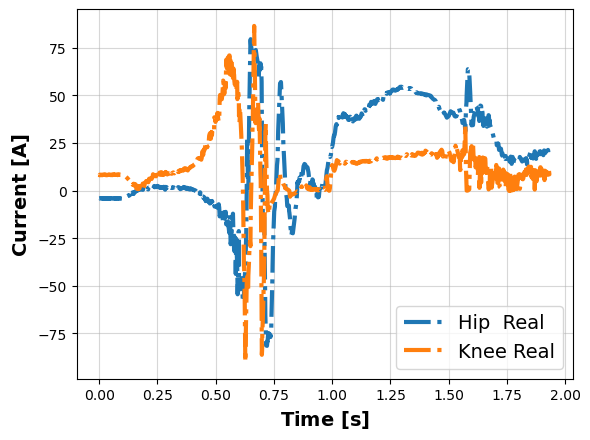

In [48]:
fig, ax = plt.subplots()
# ax.axvline(x=1, color='g', linestyle='--', label=line_write, linewidth=1.5)
plt_bag_path = os.path.join(mul_env_path,name_folder+'_test_bag',"JNT"+ str(i + 1) +"_plot_cur_2.svg")
plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_curr[index_msr,0],linewidth=line_width, linestyle = '-.', label=label_i[0] + r' Real')
plt.plot(msr_times[index_msr] - msr_times[index_msr[0]], msr_curr[index_msr,1],linewidth=line_width, linestyle = '-.', label=label_i[1] + r' Real')

plt.xlabel(r'$\mathbf{Time\,\, [s]}$', fontsize=font_size)  # Increase font size for time label
plt.ylabel(r'$\mathbf{Current\,\, [A]}$', fontsize=font_size)  # Increase font size for radians label

plt.legend(fontsize=font_size) 
plt.grid(alpha=alpha)  
plt.savefig(plt_bag_path)
plt.show() 